In [1]:
import pandas as pd
import numpy as np


# 读取数据
train = pd.read_csv('train_dic.csv')


In [2]:
train.columns

Index(['unique_id', 'date', 'warehouse', 'total_orders', 'sales',
       'sell_price_main', 'holiday_name', 'holiday', 'shops_closed',
       'winter_school_holidays', 'school_holidays', 'product_unique_id',
       'name', 'L1_category_name_en', 'L2_category_name_en',
       'L3_category_name_en', 'L4_category_name_en', 'year', 'month_sin',
       'month_cos', 'day_sin', 'day_cos', 'is_discount', 'max_discount'],
      dtype='object')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4007367 entries, 0 to 4007366
Data columns (total 24 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   unique_id               int64  
 1   date                    object 
 2   warehouse               object 
 3   total_orders            float64
 4   sales                   float64
 5   sell_price_main         float64
 6   holiday_name            object 
 7   holiday                 bool   
 8   shops_closed            bool   
 9   winter_school_holidays  bool   
 10  school_holidays         bool   
 11  product_unique_id       int64  
 12  name                    object 
 13  L1_category_name_en     object 
 14  L2_category_name_en     object 
 15  L3_category_name_en     object 
 16  L4_category_name_en     object 
 17  year                    object 
 18  month_sin               float64
 19  month_cos               float64
 20  day_sin                 float64
 21  day_cos                 float64

In [4]:
# train.drop(['month_sin','month_cos'], axis=1, inplace=True)
# train.drop(['warehouse_total_orders','L1_category_name_en_total_orders','holiday_name_total_orders'], axis=1, inplace=True)
# train.drop(['month_10', 'month_11', 'month_12',
#        'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
#        'month_8', 'month_9'], axis=1, inplace=True)
# train.drop(['holiday_name_total_orders','warehouse_total_orders','L1_category_name_en_total_orders'], axis=1, inplace=True)
# train.drop(['warehouse_monthly_sales_mean','holiday_name_monthly_sales_mean','L1_category_name_en_monthly_sales_mean'], axis=1, inplace=True)
# train.drop(['L1_category_name_en_weekday_sales_mean','warehouse_weekday_sales_mean','holiday_name_weekday_sales_mean'], axis=1, inplace=True)
# train.drop(['weekday_1', 'weekday_2', 'weekday_3',
#        'weekday_4', 'weekday_5', 'weekday_6'], axis=1, inplace=True)
# train.drop(['warehouse_total_orders', 
#        'warehouse_weekday_sales_mean', 'warehouse_mean',
#        'holiday_name_total_orders', 
#        'holiday_name_weekday_sales_mean', 'holiday_name_mean',
#        'L1_category_name_en_total_orders',
       
#        'L1_category_name_en_weekday_sales_mean', 'L1_category_name_en_mean',
#        'year_mean', 'name_mean', 'L2_category_name_en_mean',
#        'L3_category_name_en_mean', 'L4_category_name_en_mean'], axis=1, inplace=True)

In [5]:
train['date'] = pd.to_datetime(train['date'])
# 定义验证集的日期范围
val_start_date1 = pd.to_datetime('2023-06-03')
val_end_date1 = pd.to_datetime('2023-06-16')

val_start_date2 = pd.to_datetime('2024-05-03')
val_end_date2 = pd.to_datetime('2024-06-03')

# 划分第一个验证集
val1 = train[(train['date'] >= val_start_date1) & (train['date'] <= val_end_date1)]  # 2023-06-03 到 2023-06-16 的数据

# 划分第二个验证集
val2 = train[(train['date'] >= val_start_date2) & (train['date'] <= val_end_date2)]  # 2024-05-03 到 2024-06-03 的数据

# 合并两个验证集
val = pd.concat([val1, val2])

# 划分训练集
# 训练集是除了两个验证集之外的数据
train_before_val1 = train[train['date'] < val_start_date1]  # 第一个验证集之前的数据
train_between_vals = train[(train['date'] > val_end_date1) & (train['date'] < val_start_date2)]  # 两个验证集之间的数据
train_after_val2 = train[train['date'] > val_end_date2]  # 第二个验证集之后的数据

# 合并训练集
train = pd.concat([train_before_val1, train_between_vals, train_after_val2])

# 检查数据量
print("训练集数据量：", len(train))
print("验证集数据量：", len(val))

训练集数据量： 3853808
验证集数据量： 153559


In [6]:
train_date = train['date']
val_date = val['date']
train.drop(['unique_id','date'], axis=1, inplace=True)
val.drop(['unique_id','date'], axis=1, inplace=True)
y_train = train['sales']
y_val = val['sales']
train = train.drop(columns=['sales'])
val = val.drop(columns=['sales'])
y_train

1          12.63
2          34.55
3          34.52
4          35.92
6           6.39
           ...  
4007362    26.56
4007363    27.42
4007364    33.39
4007365    22.88
4007366    32.10
Name: sales, Length: 3853808, dtype: float64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3853808 entries, 1 to 4007366
Data columns (total 21 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   warehouse               object 
 1   total_orders            float64
 2   sell_price_main         float64
 3   holiday_name            object 
 4   holiday                 bool   
 5   shops_closed            bool   
 6   winter_school_holidays  bool   
 7   school_holidays         bool   
 8   product_unique_id       int64  
 9   name                    object 
 10  L1_category_name_en     object 
 11  L2_category_name_en     object 
 12  L3_category_name_en     object 
 13  L4_category_name_en     object 
 14  year                    object 
 15  month_sin               float64
 16  month_cos               float64
 17  day_sin                 float64
 18  day_cos                 float64
 19  is_discount             bool   
 20  max_discount            float64
dtypes: bool(5), float64(7), int64(1), ob

In [8]:
import lightgbm as lgb

# 需要处理的字符串特征列表
categorical_cols = [
    'warehouse', 
    'holiday_name', 
    'name',
    'L1_category_name_en', 
    'L2_category_name_en', 
    'L3_category_name_en', 
    'L4_category_name_en',
    'year'  # 如果 year 是字符串（如 "2023"），也视为类别
]
# 将对象列转换为 pandas 的 category 类型
for col in categorical_cols:
    train[col] = train[col].astype('category')
    val[col] = val[col].astype('category')
# 创建 LightGBM Dataset，并指定类别特征
train_data = lgb.Dataset(
    train,  # 仅使用字符串特征（可根据需要加入其他数值特征）
    label=y_train,
    categorical_feature=categorical_cols,  # 明确指定这些列为类别特征
    free_raw_data=False
)

test_data = lgb.Dataset(
    val,
    label=y_val,
    reference=train_data,  # 继承训练集的类别编码
    free_raw_data=False
)


In [9]:
# # 定义 LightGBM 参数
# params = {
#     'boosting_type': 'gbdt',          # 提升类型：gbdt（梯度提升决策树）
#     'objective': 'regression',        # 目标函数：回归任务
#     'metric': 'wmae',                 # 评估指标：均方根误差
#     'num_leaves': 500,                 # 每棵树的最大叶子数
#     'learning_rate': 0.02,            # 学习率
#     'feature_fraction': 0.8,          # 每次迭代时随机选择 90% 的特征
#     'bagging_fraction': 0.8,          # 每次迭代时随机选择 80% 的数据
#     'bagging_freq': 10,                # 每 5 次迭代进行一次 bagging
#     'verbose': -1,                    # 不输出日志信息
#     'seed': 42,                       # 随机种子
#     'num_threads': -1,                # 使用所有可用的 CPU 核心
#     'max_depth': None,                  # 树的最大深度，-1 表示不限制
#     'min_data_in_leaf': 5,           # 叶节点最小样本数
#     'lambda_l1': 1,                 # L1 正则化
#     'lambda_l2': 0.5,                 # L2 正则化
#     'device': 'gpu',                  # 使用 CPU 或 GPU（设置为 'gpu' 以启用 GPU 加速）
# }
params = {
    'objective': 'regression',  # 根据任务调整
    'metric': 'wmae',           # 评估指标
    'max_depth': 10,             # 树的最大深度
                 # 不输出日志信息
    'seed': 42,
    'gpu_device_id': 0,         # 使用第 0 块 GPU（多卡时可调整）
    'num_leaves': 100,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'verbose': -1
}

In [10]:
# 训练模型（每 20 步输出一次评估结果）
model = lgb.train(
    params,
    train_data,
    num_boost_round=600,        # 总迭代次数
    valid_sets=[train_data, test_data],  # 监控训练集和测试集
    valid_names=['train', 'test'],
    callbacks=[
        lgb.log_evaluation(period=20),  # 每 20 步输出评估指标
    ]
)

In [11]:
# # 保存模型（可选）
# model.save_model('lightgbm_model.txt')

In [12]:
val

,warehouse,total_orders,sell_price_main,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,product_unique_id,name,...,L2_category_name_en,L3_category_name_en,L4_category_name_en,year,month_sin,month_cos,day_sin,day_cos,is_discount,max_discount
51,Budapest_1,5811.0,646.26,week,False,False,False,False,2375,Croissant_35,...,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,year_2023,1.224647e-16,-1.000000,0.101168,-0.994869,True,0.15312
55,Budapest_1,5404.0,646.26,Day of National Unity,False,False,False,False,2375,Croissant_35,...,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,year_2023,1.224647e-16,-1.000000,0.724793,0.688967,True,0.15312
56,Budapest_1,5727.0,646.26,week,False,False,False,False,2375,Croissant_35,...,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,year_2023,1.224647e-16,-1.000000,0.651372,-0.758758,True,0.15312
121,Budapest_1,5731.0,646.26,week,False,False,False,False,2375,Croissant_35,...,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,year_2023,1.224647e-16,-1.000000,0.299363,-0.954139,True,0.15312
533,Budapest_1,5731.0,646.26,week,False,False,False,False,2375,Croissant_35,...,Bakery_L2_18,Bakery_L3_83,Bakery_L4_1,year_2023,1.224647e-16,-1.000000,0.848644,0.528964,True,0.15312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007250,Frankfurt_1,1181.0,0.88,week,False,False,False,False,934,Kiwi_10,...,Fruit and vegetable_L2_1,Fruit and vegetable_L3_15,Fruit and vegetable_L4_1,year_2024,5.000000e-01,-0.866025,-0.848644,0.528964,False,0.00000
4007251,Frankfurt_1,1651.0,0.88,week,False,False,False,False,934,Kiwi_10,...,Fruit and vegetable_L2_1,Fruit and vegetable_L3_15,Fruit and vegetable_L4_1,year_2024,5.000000e-01,-0.866025,-0.968077,-0.250653,False,0.00000
4007252,Frankfurt_1,2143.0,0.88,week,False,False,False,False,934,Kiwi_10,...,Fruit and vegetable_L2_1,Fruit and vegetable_L3_15,Fruit and vegetable_L4_1,year_2024,5.000000e-01,-0.866025,-0.299363,-0.954139,False,0.00000
4007253,Frankfurt_1,1783.0,0.88,week,False,False,False,False,934,Kiwi_10,...,Fruit and vegetable_L2_1,Fruit and vegetable_L3_15,Fruit and vegetable_L4_1,year_2024,5.000000e-01,-0.866025,-0.571268,0.820763,False,0.00000


In [13]:
# 使用训练好的模型进行预测
y_pred = model.predict(val)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mae = mean_absolute_error(y_val, y_pred)
print(f'MAE: {mae}')

# 计算均方误差 (MSE)
mse = mean_squared_error(y_val, y_pred)
print(f'MSE: {mse}')

# 计算 R² (决定系数)
r2 = r2_score(y_val, y_pred)
print(f'R² Score: {r2}')

# 输出预测结果
print('Predictions:', y_pred)




MAE: 25.028389279363598
MSE: 4567.527991750863
R² Score: 0.9704454896070314
Predictions: [ 23.22379621  25.0323308   24.54260879 ...  49.98529426  44.94547062
 114.35103617]


In [14]:
feature_importances = model.feature_importance(importance_type='split')  # 或 'gain'
importance_df = pd.DataFrame({
    'Feature': train.columns,
    'Importance': feature_importances
})

In [15]:
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
9,name,15118
1,total_orders,6958
20,max_discount,6763
2,sell_price_main,6590
15,month_sin,3296
16,month_cos,3187
14,year,3081
8,product_unique_id,2734
17,day_sin,2565
12,L3_category_name_en,2400


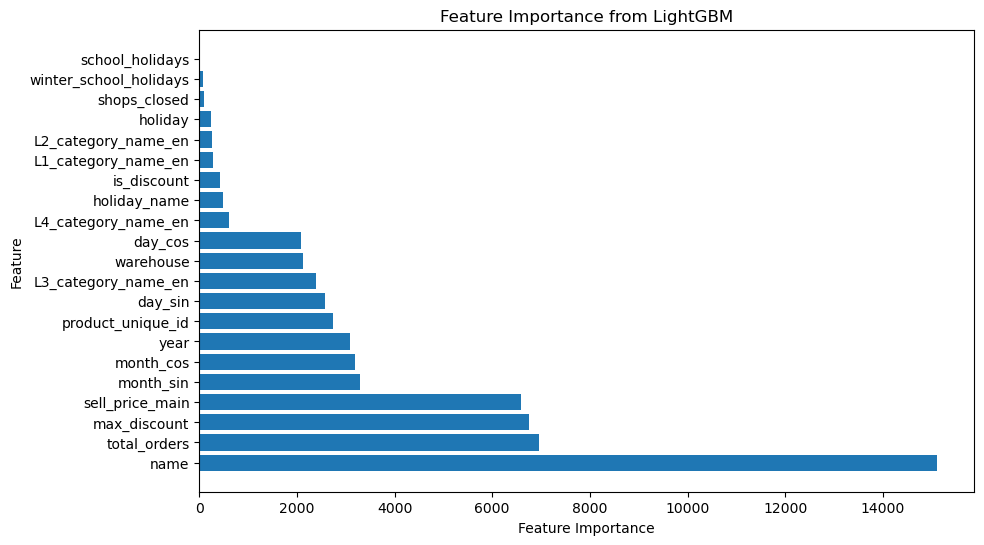

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from LightGBM')
plt.show()

In [17]:
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# 计算分位数
bins = np.quantile(y_val, [0.33, 0.66])

# 将目标变量分为低、中、高三个区间
y_val_binned = np.digitize(y_val, bins)

# 输出区间范围
print(f'Low range: y_val < {bins[0]:.2f}')
print(f'Mid range: {bins[0]:.2f} <= y_val < {bins[1]:.2f}')
print(f'High range: y_val >= {bins[1]:.2f}')

# 计算每个区间的 MAE
for i in range(3):
    mask = y_val_binned == i
    mae = mean_absolute_error(y_val[mask], y_pred[mask])
    print(f'MAE for bin {i}: {mae:.2f}')


Low range: y_val < 24.80
Mid range: 24.80 <= y_val < 66.39
High range: y_val >= 66.39
MAE for bin 0: 8.50
MAE for bin 1: 13.16
MAE for bin 2: 52.59


In [18]:
# # 读取数据
# test = pd.read_csv('test_encode.csv')
# test_date = test['date']
# test.drop(['unique_id','date'], axis=1, inplace=True)
# t_pred = model.predict(test)

In [19]:
# # 计算分位数
# bins = np.quantile(t_pred, [0.33, 0.66])

# # 将目标变量分为低、中、高三个区间
# t_pred_binned = np.digitize(t_pred, bins)

# # 输出区间范围
# print(f'Low range: t_pred < {bins[0]:.2f}')
# print(f'Mid range: {bins[0]:.2f} <= t_pred < {bins[1]:.2f}')
# print(f'High range: t_pred >= {bins[1]:.2f}')

In [20]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# test['sales'] = t_pred
# test['date'] = test_date
# # 绘制图形
# plt.figure(figsize=(15, 8))

# # 绘制第一个验证集的实际销售数据（黄色）
# sns.lineplot(data=test, x='date', y='sales', color='yellow', label='Validation True Sales')

# # 添加标题和标签
# plt.title('Validation Set: True vs Predicted Sales (2023-2024)')
# plt.xlabel('Date')
# plt.ylabel('Sales')
# plt.legend()
# plt.grid()
# plt.show()

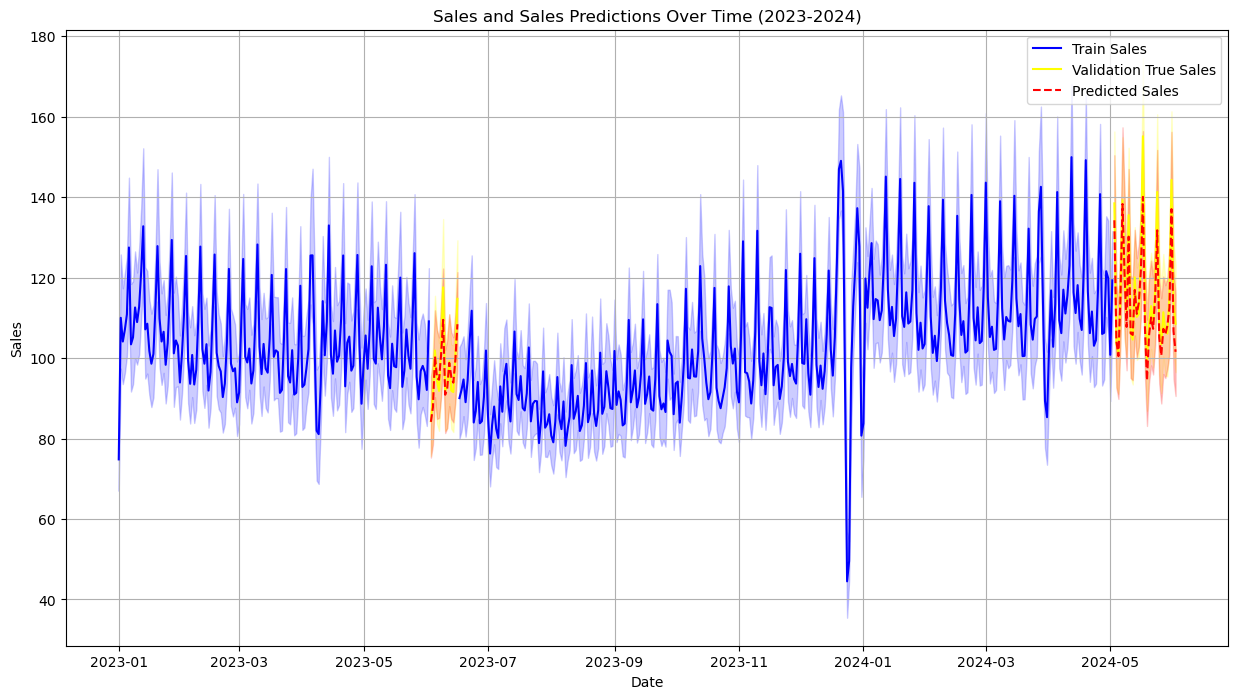

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 定义验证集的日期范围
val_start_date1 = pd.to_datetime('2023-06-03')
val_end_date1 = pd.to_datetime('2023-06-16')

val_start_date2 = pd.to_datetime('2024-05-03')
val_end_date2 = pd.to_datetime('2024-06-03')

train['date'] = train_date
val['date'] = val_date

train['sales'] = y_train
val['sales'] = y_val
# 确保 train 和 val 的 date 列是 datetime 类型
train['date'] = pd.to_datetime(train['date'])
val['date'] = pd.to_datetime(val['date'])

# 将预测值添加到验证集中
val['sales_hat'] = y_pred

# 划分训练集为多个部分
train_before_val1 = train[train['date'] < val_start_date1]  # 第一个验证集之前的数据
train_between_vals = train[(train['date'] > val_end_date1) & (train['date'] < val_start_date2)]  # 两个验证集之间的数据
train_after_val2 = train[train['date'] > val_end_date2]  # 第二个验证集之后的数据

# 划分验证集为多个部分
val1 = val[(val['date'] >= val_start_date1) & (val['date'] <= val_end_date1)]  # 第一个验证集
val2 = val[(val['date'] >= val_start_date2) & (val['date'] <= val_end_date2)]  # 第二个验证集

# 仅保留 2023 年和 2024 年的数据
train_before_val1 = train_before_val1[train_before_val1['date'].dt.year.isin([2023, 2024])]
train_between_vals = train_between_vals[train_between_vals['date'].dt.year.isin([2023, 2024])]
train_after_val2 = train_after_val2[train_after_val2['date'].dt.year.isin([2023, 2024])]
val1 = val1[val1['date'].dt.year.isin([2023, 2024])]
val2 = val2[val2['date'].dt.year.isin([2023, 2024])]

# 绘制图形
plt.figure(figsize=(15, 8))

# 绘制第一个验证集之前训练集的实际销售数据（蓝色）
sns.lineplot(data=train_before_val1, x='date', y='sales', color='blue', label='Train Sales ')

# 绘制两个验证集之间训练集的实际销售数据（蓝色）
sns.lineplot(data=train_between_vals, x='date', y='sales', color='blue')

# 绘制第二个验证集之后训练集的实际销售数据（蓝色）
sns.lineplot(data=train_after_val2, x='date', y='sales', color='blue')

# 绘制第一个验证集的实际销售数据（黄色）
sns.lineplot(data=val1, x='date', y='sales', color='yellow', label='Validation True Sales')

# 绘制第二个验证集的实际销售数据（黄色）
sns.lineplot(data=val2, x='date', y='sales', color='yellow')

# 绘制第一个验证集的预测销售数据（红色虚线）
sns.lineplot(data=val1, x='date', y='sales_hat', color='red', linestyle='--', label='Predicted Sales')

# 绘制第二个验证集的预测销售数据（红色虚线）
sns.lineplot(data=val2, x='date', y='sales_hat', color='red', linestyle='--')

# 添加标题和标签
plt.title('Sales and Sales Predictions Over Time (2023-2024)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

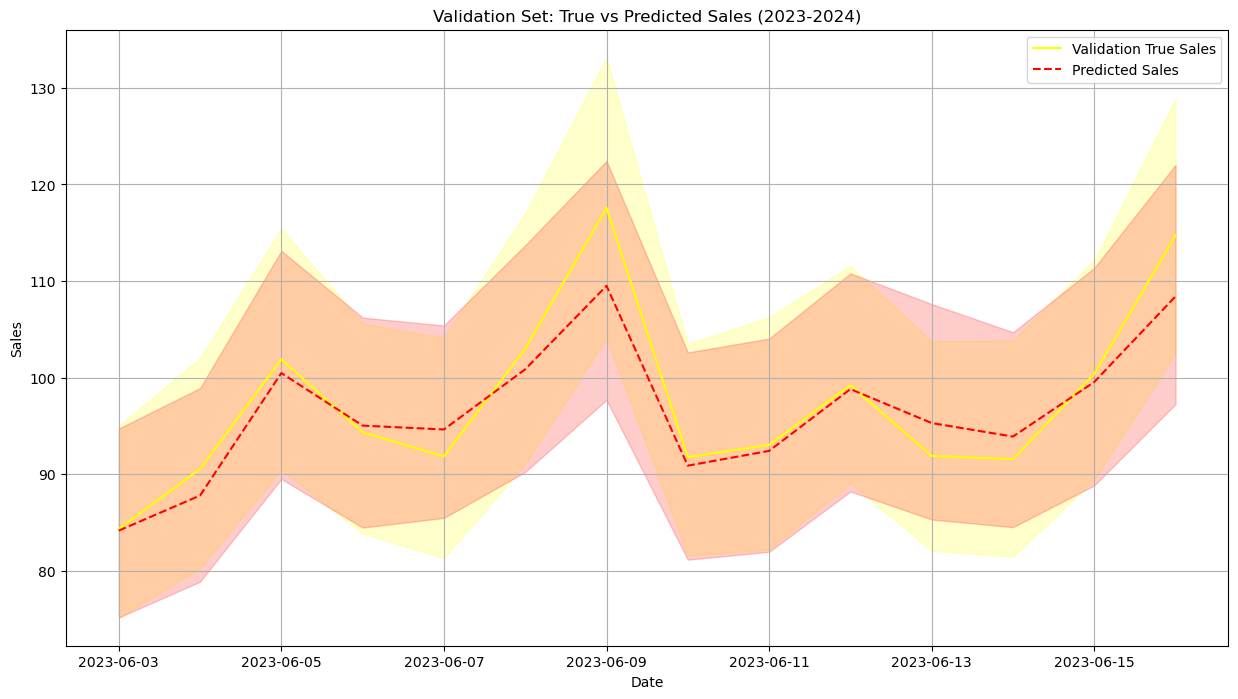

In [22]:
# 绘制图形
plt.figure(figsize=(15, 8))

# 绘制第一个验证集的实际销售数据（黄色）
sns.lineplot(data=val1, x='date', y='sales', color='yellow', label='Validation True Sales')

# 绘制第一个验证集的预测销售数据（红色虚线）
sns.lineplot(data=val1, x='date', y='sales_hat', color='red', linestyle='--', label='Predicted Sales')

# 添加标题和标签
plt.title('Validation Set: True vs Predicted Sales (2023-2024)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

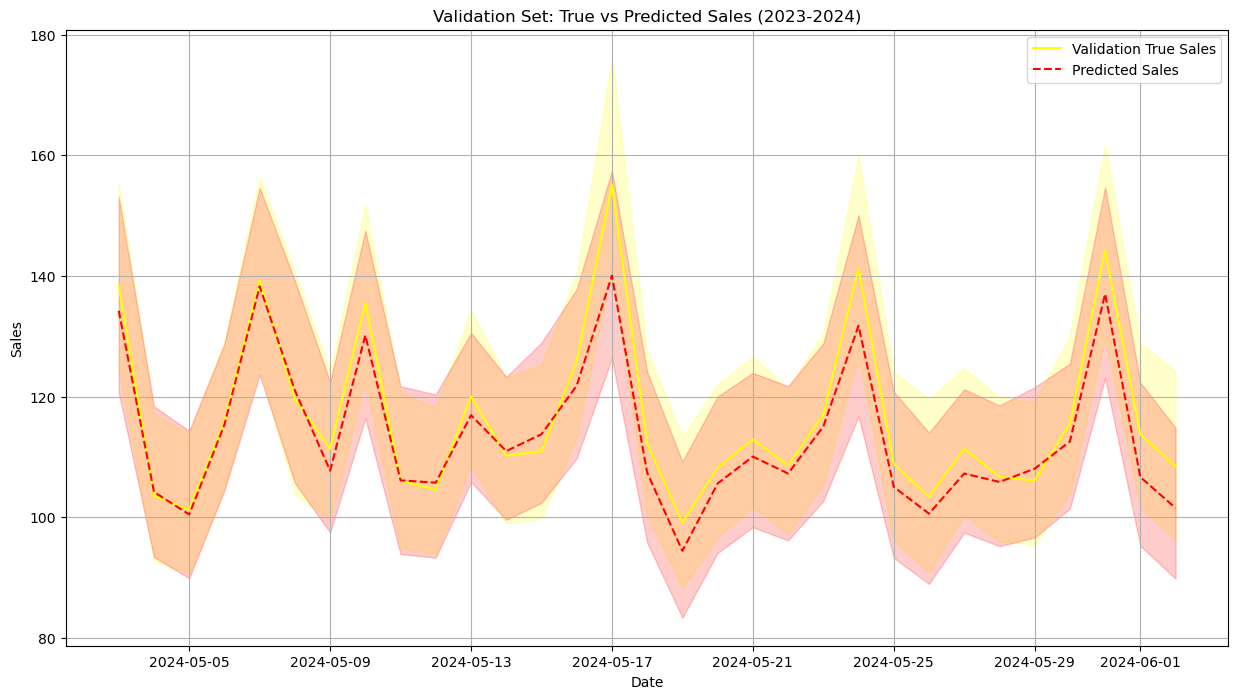

In [23]:
# 绘制图形
plt.figure(figsize=(15, 8))

# 绘制第二个验证集的实际销售数据（黄色）
sns.lineplot(data=val2, x='date', y='sales', color='yellow', label='Validation True Sales')

# 绘制第二个验证集的预测销售数据（红色虚线）
sns.lineplot(data=val2, x='date', y='sales_hat', color='red', linestyle='--', label='Predicted Sales')

# 添加标题和标签
plt.title('Validation Set: True vs Predicted Sales (2023-2024)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()